# Stage 1 Analysis
#### Partial rank correlation coefficient analysis (PRCC) - regression based analysis code

### Step 1: Input preparation 

In [1]:
#####NIMML######
### Author: Meghna Verma
### Date : August 10, 2017

#Set it to the directory that has all the csv files obatined after converting the tsv file outptus from hybrid model
setwd("/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres")

In [6]:
library("qpcR")

## Reading all csv files ##
temp = list.files(pattern="*.csv")

LP_Mres = read.csv(temp[1], header = FALSE)
LP_Mres = LP_Mres[,2];

for (i in 2:length(temp))
{
  file_one <- read.csv(temp[i],header = FALSE)
  file_one <- file_one[,2]
  
  # This pads NA to the rows that are shorter than rest #
  LP_Mres <- qpcR:::cbind.na(LP_Mres, file_one)
}

df_LP_Mres <- data.frame(LP_Mres)

write.csv(df_LP_Mres, "/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/ClusterFiles_Aug1/Mres_LP_input.csv")


### Clustering 

In [7]:
## Cmeans clustering ##
library(e1071)

input_tobeclustered2 <- read.csv("/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/ClusterFiles_Aug1/Mres_LP_input.csv", sep=",", header = TRUE)
input_tobeclustered2 <- input_tobeclustered2[,-1] 
input_tobeclustered <- t(input_tobeclustered2)
transposed <- input_tobeclustered

transposed[is.na(transposed)] <- 0

clustered_data<-cmeans(transposed, 3, iter.max = 100, verbose = FALSE, dist = "euclidean",
                       method = "cmeans", m = 2, rate.par = NULL, weights = 1)

write.csv(clustered_data$cluster, "/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/ClusterFiles_Aug1/Mres_LP_clusters_numbers.csv")
write.csv(clustered_data$membership, "/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/ClusterFiles_Aug1/Mres_LPclusters.csv")




Warning message:
“package ‘e1071’ was built under R version 3.3.2”

In [2]:
 ### View the clusters

In [1]:
#library(corrplot)

#layout(matrix(1:6, nrow = 6))
#corrplot(t(clustered_data$membership[1:45,]), tl.cex = 0.2, cl.cex = 0.3)
#corrplot(t(clustered_data$membership[46:91,]), tl.cex = 0.2)
#corrplot(t(clustered_data$membership[92:137,]), tl.cex = 0.2)
#corrplot(t(clustered_data$membership[138:152,]), tl.cex = 0.2)


### Raw data visualization

#### Input file: 
1. Cluster csv (number) 'likelihood' file obtained from the above clustering code
2. Parameter design file
3. All .csv files with avg values
4. Corresponding cells file 

#### Output file: 
1. Csv files that are clustered in different sets
2. Graphs that show the different clusters     


In [11]:
# Create empty variables to be filled up
cluster1 = vector(); 
cluster2 = vector();
cluster3 = vector();
 
##install.packages("readr")
library(readr)

dataset <- read_csv("/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/ClusterFiles_Aug1/Mres_LP_clusters_numbers.csv",col_types = cols(X1 = col_character()))


Parameters<- read_csv("/Users/meghnaverma/Documents/MATLAB/NIMML/ENISI_output_SA_avg/LP_Macrophage_State2/cluster_numbers/Parameters.csv", col_names = FALSE)

# 
sorted <- dataset[with(dataset, order(x)),]
# 
index <- sort.int(dataset$x, index.return = TRUE)
# 
for (i in 1:152)
{
   if (sorted$x[i] == 1)
   {
     cluster1 <- rbind (cluster1,index$ix[i])
   }
   else if (sorted$x[i] == 2)
   {
     cluster2 <- rbind (cluster2,index$ix[i])
   }
   else
   {
     cluster3 <- rbind (cluster3,index$ix[i])
   }
 }

# # Make vectors of names of csv files that correspond to the clustered sets.
 cluster1_files <- vector()
 cluster2_files <- vector()
 cluster3_files <- vector()
# 
para1_files <- vector()
para2_files <- vector()
para3_files <- vector()
 
temp = list.files(pattern="*.csv")

Corresponding_cells <- read.csv("/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/HP_testpaper/Correponding_cells.csv")

SAMPLE1 <- Corresponding_cells
sorted_matlab <- sort.int(SAMPLE1$MATLAB, index.return = TRUE)

for (j in 1:length(cluster1))
 {

   cluster1_files <- rbind (cluster1_files, temp[cluster1[j]])
   para1_files <- rbind(para1_files, Parameters[sorted_matlab$ix[cluster1[j]],])
 }
for (k in 1:length(cluster2))
 {
 
  cluster2_files <- rbind (cluster2_files, temp[cluster2[k]])
   para2_files <- rbind(para2_files, Parameters[sorted_matlab$ix[cluster2[k]],])
 }
 
for (l in 1:length(cluster3))
 {

   cluster3_files <- rbind (cluster3_files, temp[cluster3[l]])
   para3_files <- rbind(para3_files, Parameters[sorted_matlab$ix[cluster3[l]],]) 
}


Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_integer()
)
See spec(...) for full column specifications.


### Visualization of the the clusters for raw data

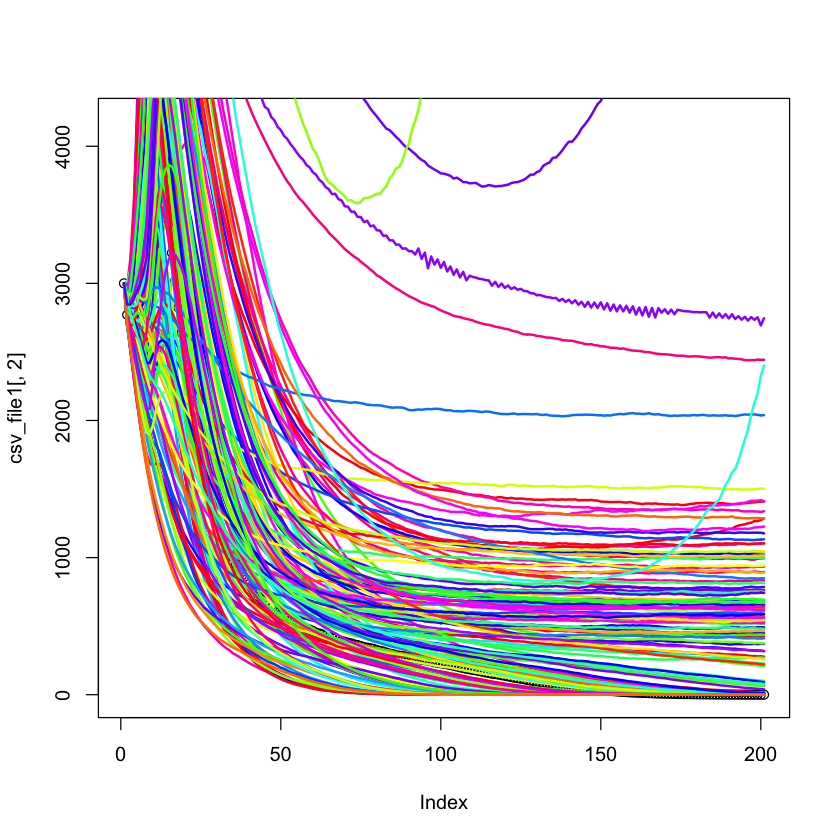

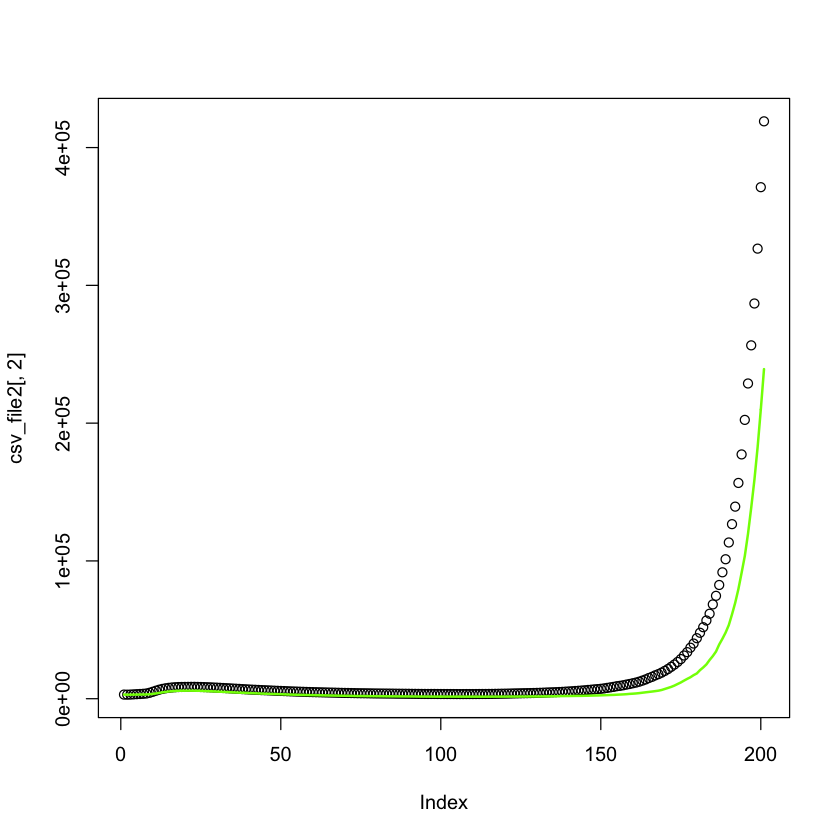

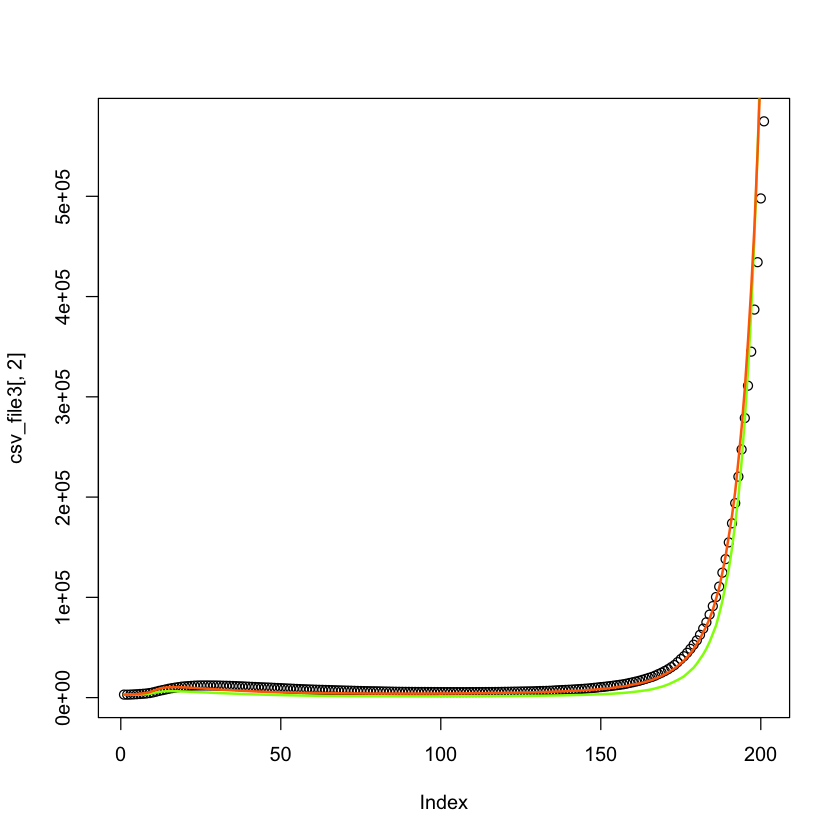

In [12]:


csv_file1 <- read.csv(cluster1_files[1], header = FALSE)
plot(csv_file1[,2])
for (a in 2:length(cluster1_files))
{
  csv_file1 <- read.csv(cluster1_files[a], header = FALSE) 
  lines(csv_file1[,2], col=sample(rainbow(100)), lwd=2, xlab = 'Ticks', ylab = '# of agents')
}

csv_file2 <- read.csv(cluster2_files[1], header = FALSE)
plot(csv_file2[,2])
for (b in 2:length(cluster2_files))
{
  csv_file2 <- read.csv(cluster2_files[b], header = FALSE) 
  lines(csv_file2[,2], col=sample(rainbow(100)), lwd=2, xlab = 'Ticks', ylab = '# of agents')
}

csv_file3 <- read.csv(cluster3_files[1], header = FALSE)
plot(csv_file3[,2])
for (c in 2:length(cluster3_files))
{
  csv_file3 <- read.csv(cluster3_files[c], header = FALSE) 
  lines(csv_file3[,2], col=sample(rainbow(100)), lwd=2, xlab = 'Ticks', ylab = '# of agents')
}


### Step 2 : Preparing the dataset for partial rank correlation coefficient analyses (PRCC)

In [13]:

para1_patterns <- para1_files
para2_patterns <- para2_files
para3_patterns <- para3_files


# #files <- list.files(pattern = ".csv") ## creates a vector with all file names in your folder
# 
# ##Cluster 1 mean
polmean1 <- rep(0,length(cluster1_files))
 for(i in 1:length(cluster1_files)){
   data_my1 <- read.csv(cluster1_files[i],header=FALSE)
   data_my1 <- data_my1[,2]
   polmean1[i] <- mean(data_my1)
 }
# ##Cluster 2 mean
 polmean2 <- rep(0,length(cluster2_files))
 for(i in 1:length(cluster2_files)){
   data_my2 <- read.csv(cluster2_files[i],header=FALSE)
   data_my2 <- data_my2[,2]
   polmean2[i] <- mean(data_my2)
 }
# 
# ##Cluster 3 mean
 polmean3 <- rep(0,length(cluster3_files))
 for(i in 1:length(cluster3_files))
   {
   data_my3 <- read.csv(cluster3_files[i],header=FALSE)
   data_my3 <- data_my3[,2]
   polmean3[i] <- mean(data_my3)
 }
# 
 para1_files$mean <- polmean1
 para2_files$mean <- polmean2
 para3_files$mean <- polmean3
# 
 x <- data.frame(para1_files)
 y <- data.frame(para2_files)
 z <- data.frame(para3_files)
# 
 indexes_info <- rbind(cluster1, cluster2, cluster3)
# 
 final <- rbind(x,y,z)
 
 #list1 <- 1;
 #list2 <- 2;
 #list3 <- 3;
 
 #pattern1 <- rep("1", nrow(para1_patterns))
 #para1_patterns$pattern <- pattern1
 #pattern2 <- rep("2", nrow(para2_patterns))
 #para2_patterns$pattern <- pattern2
 #pattern3 <- rep("3", nrow(para3_patterns))
 #para3_patterns$pattern <- pattern3
 
 #x1_pattern <- data.frame(para1_patterns)
 #y1_pattern <- data.frame(para2_patterns)
 #z1_pattern <- data.frame(para3_patterns)
 
 #final1_pattern <- rbind(x1_pattern,y1_pattern,z1_pattern)
 final1_pattern <- final1_pattern[,-1]
 
 #write.csv(final1_pattern, file = '/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/LP_Mreg_final.csv', row.names = FALSE)
 write.csv(final, file = '/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/LP_Mres_means.csv', row.names = FALSE)


### Code for PRCC 

In [19]:
data_LP_Mres_main <- read.csv('/Users/meghnaverma/Documents/MATLAB/NIMML/Round2_SA/ENISI_Avg/Mres_LP/Mres/LP_Mres_means.csv', header = TRUE)

In [6]:
sorted_data_LPMres <- data_LP_Mres_main[order(data_LP_Mres_main$X1),] 
#sorted_data_LPMres

In [4]:
data_LP_Mres <- data.frame(sorted_data_LPMres[,-1])
data_LP_Mres <- data.frame(data_LP_Mres[,-39])
#data_LP_Mres <- data.frame(sorted_data_LPMres[,-39])
#data_LP_Mres

In [5]:
scaled.dat_Mres <- scale(data_LP_Mres)
colMeans(scaled.dat_Mres)
apply(scaled.dat_Mres, 2, sd)

In [26]:
total_data_Mres <- data.frame(cbind(scaled.dat_Mres, sorted_data_LPMres[,40]))

In [28]:
library("sensitivity")

In [29]:
coeff_pcc_Mres <- pcc(total_data_Mres[,1:38], total_data_Mres[,39], nboot = 500, rank = TRUE, conf = 0.95)

In [30]:
write.csv(coeff_pcc_Mres$PRCC, "Mres_prcc.csv")

Warning message in par(las = 2, cex.names = 0.5):
“"cex.names" is not a graphical parameter”

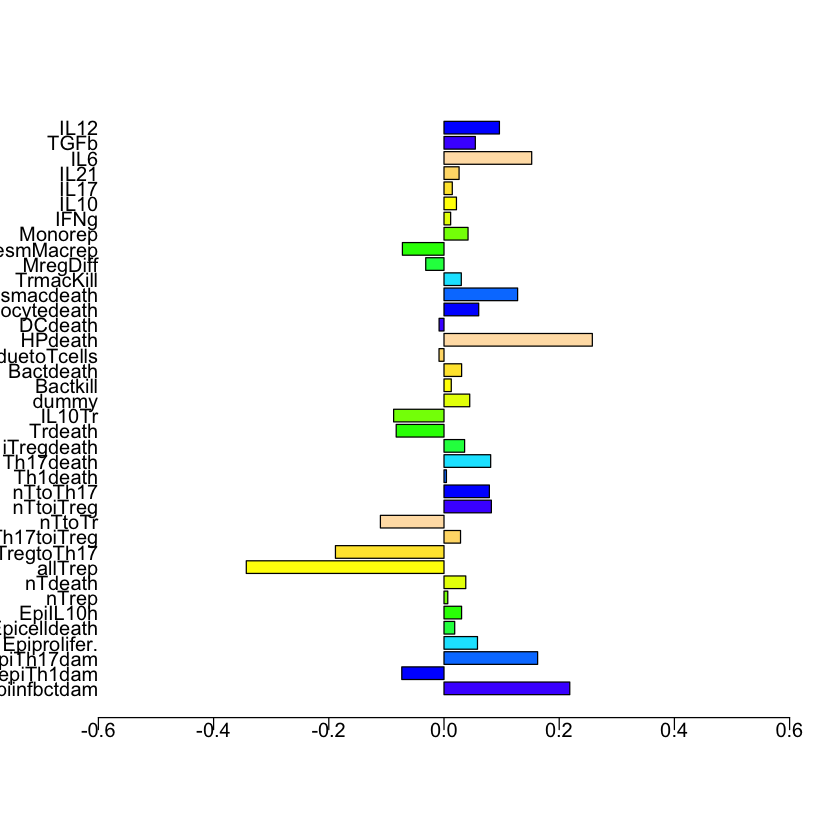

In [31]:
label <- c("epiinfbctdam", "epiTh1dam", "epiTh17dam", "Epiprolifer.","Epicelldeath","EpiIL10h","nTrep","nTdeath","allTrep","iTregtoTh17","Th17toiTreg","nTtoTr","nTtoiTreg", "nTtoTh17","Th1death","Th17death","iTregdeath","Trdeath", "IL10Tr","dummy","Bactkill","Bactdeath", "HPdeathduetoTcells","HPdeath","DCdeath","Monocytedeath","Resmacdeath","TrmacKill","MregDiff","ResmMacrep","Monorep","IFNg","IL10","IL17","IL21","IL6","TGFb","IL12")
par(las=2, cex.names = 0.5)
barplot(coeff_pcc_Mres$PRCC$original, horiz=TRUE, col=topo.colors(12), xlim = c(-0.6, 0.6), names.arg = label, mgp=c(0.001,0.00001,.0001), las=1)

In [32]:
library(epiR)
coeff_prcc_pMres <- epi.prcc(total_data_Mres, sided.test = 2)


Loading required package: survival
Warning message:
“package ‘survival’ was built under R version 3.3.2”
Attaching package: ‘survival’

The following object is masked from ‘package:robustbase’:

    heart

Package epiR 0.9-96 is loaded
Type help(epi.about) for summary information




In [33]:
write.csv(coeff_prcc_pMres, "Mres_p.csv")


In [34]:
Mres <- which(coeff_prcc_pMres$p.value < 0.05)

In [35]:
write.csv(Mres, "Mres.csv")

In [37]:
Mres

[1]  1  3  9 10 24

In [ ]:
cols <- c("gray", "blue")[(coeff_prcc_pMres$p.value < 0.05)+1]
barplot(coeff_pcc_Mres$original, horiz=TRUE, col=cols, names.arg = label, cex.names = 0.6,cex.lab = 0.9, cex.main = 0.65, cex.axis = 0.65,
        xlim = c(-0.4, 0.4), ylim = c(0,30))